In [1]:
from pandas import read_csv
df=read_csv('teletrabajo.csv', sep=';')
print(df)

      group  data
0   Grupo_A   8.6
1   Grupo_A   9.8
2   Grupo_A   9.8
3   Grupo_A   8.3
4   Grupo_A   7.6
5   Grupo_A   3.9
6   Grupo_A   7.6
7   Grupo_A   5.7
8   Grupo_A   9.0
9   Grupo_A   6.2
10  Grupo_A   8.0
11  Grupo_A   6.3
12  Grupo_A   7.4
13  Grupo_A   9.4
14  Grupo_B   6.6
15  Grupo_B   8.4
16  Grupo_B   8.5
17  Grupo_B   4.2
18  Grupo_B   7.3
19  Grupo_B   8.9
20  Grupo_B   3.0
21  Grupo_B   6.3
22  Grupo_B   6.3
23  Grupo_B   4.3
24  Grupo_B   7.2
25  Grupo_B   7.0
26  Grupo_B   5.6
27  Grupo_B   6.1
28  Grupo_B   8.1
29  Grupo_B   4.3
30  Grupo_B   4.1
31  Grupo_B   8.8


En nuestro problema, se desea comparar la diferencia de productividad (variable de tipo cuantitativo) entre dos sucursales independientes.

Una vez conocemos la naturaleza de los datos y nuestro diseño de investigación, procedemos a establecer las hipótesis: 


*   H0 : Media del productividad tele (grupo A) = Media del productividad no tele (grupo B)

*   H1 : Media del productividad tele (grupo A) ≠ Media del productividad no tele (grupo B)



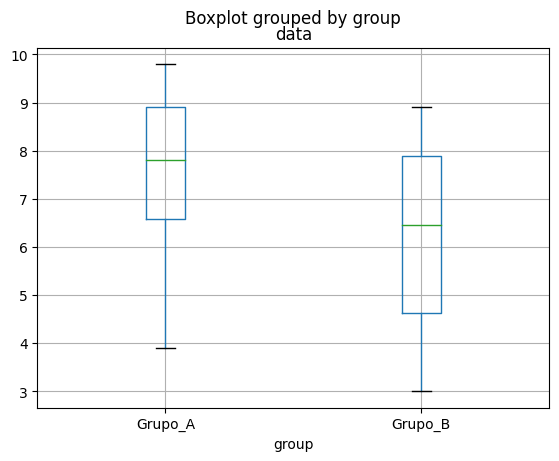

In [11]:
# Diagrama de cajas
#Asignación de nombres a los grupos
Grupo_A = df['data'][df['group'] == 'Grupo_A']
Grupo_B = df['data'][df['group'] == 'Grupo_B']

boxplot = df.boxplot(column=['data'],by='group')

In [12]:
#Importar módulos a utilizar
from statistics import mean
from numpy import percentile

# Estadísticos descriptivos: Media, Mediana y desviación típica
media=mean(Grupo_A)
print('La media del grupo A es=',media) 
mediana=percentile(Grupo_A,50)
print('La mediana del grupo A es=',mediana)
print('La desviación típica del grupo A es=',Grupo_A.std())

media=mean(Grupo_B)
print('La media del grupo B es=',media) 
mediana=percentile(Grupo_B,50)
print('La mediana del grupo B es=',mediana)
print('La desviación típica del grupo B es=',Grupo_B.std())


La media del grupo A es= 7.685714285714286
La mediana del grupo A es= 7.8
La desviación típica del grupo A es= 1.696538168813705
La media del grupo B es= 6.388888888888889
La mediana del grupo B es= 6.449999999999999
La desviación típica del grupo B es= 1.8217279737813536


In [13]:
from scipy import stats
skew = stats.skew (Grupo_A) #buscando asimetría
curtosis = stats.kurtosis (Grupo_A) #buscando curtosis 
print('Grupo A:',skew, curtosis)

skew = stats.skew (Grupo_B) #buscando asimetría
curtosis = stats.kurtosis (Grupo_B) #buscando curtosis 
print('Grupo B:',skew, curtosis)

Grupo A: -0.6671905275757153 -0.18062327620403096
Grupo B: -0.2624432196355973 -1.0750719527745836


Contraste de hipótesis del Test de Shapiro-Wilk
*   H0: los datos provienen de una población distribuida normalmente (p > 0.05)
*   H1: los datos NO provienen de una población distribuida normalmente (p < 0.05)


Dado que el Test de Shapiro-Wilk resulta en una  pA = 0.46 y pB = 0.87 (p > 0.05), no se encuentra evidencia para no asumir que ambas muestras provienen de una población distribuida normalmente. Podemos emplear pruebas paramétricas para realizar la comparación de los datos.

In [14]:
# Supuesto de Normalidad: Prueba de Shapiro-Wilk
from scipy.stats import shapiro
shapiro_A, p_A  = shapiro(Grupo_A)
shapiro_B, p_B  = shapiro(Grupo_B)
print('pGrupoA=',p_A)
print('pGrupoB=',p_B)

pGrupoA= 0.4629003405570984
pGrupoB= 0.277078777551651


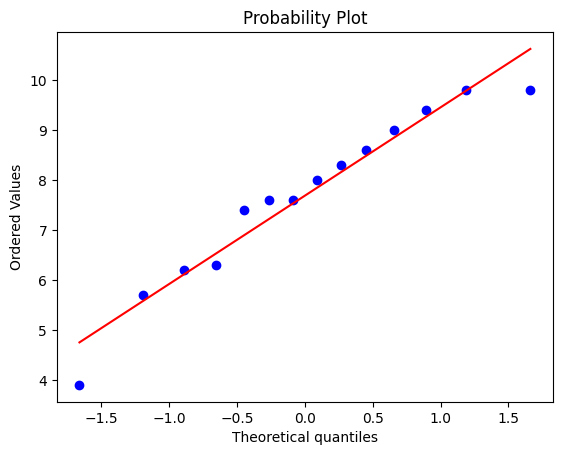

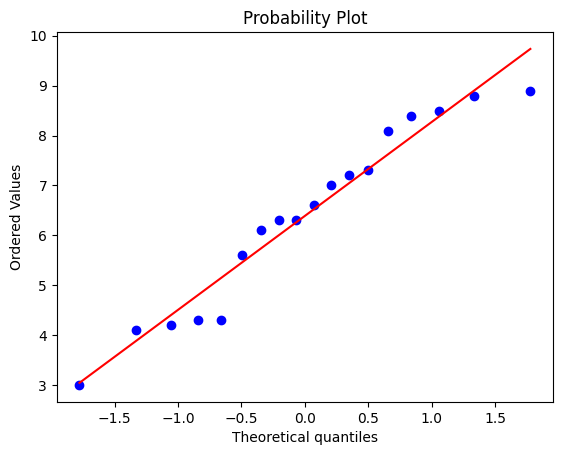

In [15]:
#Importar módulos a utilizar
from matplotlib import pyplot
from scipy.stats import probplot
from matplotlib.pyplot import show

#Gráfico de normalidad
probplot(Grupo_A, dist="norm", plot=pyplot)
show()
probplot(Grupo_B, dist="norm", plot=pyplot)
show()


Contraste de hipótesis del Test de Levene:


*   H0: las varianzas poblacionales son iguales (p > 0.05)
*   H1: las varianzas poblacionales son diferentes (p < 0.05)

Dado que Test de Levene resulta en una p = 0.92 (p>0.05), no se rechaza Ho y podemos asumir que las varianzas poblacionales son iguales.

In [16]:
# Supuesto de homogeneidad de varianzas: Prueba de Levene
from scipy.stats import levene
stat, p = levene(Grupo_A, Grupo_B)
[stat, p]

[0.23996143476941156, 0.6277972082179144]

Una vez comprobado que los datos de ambas muestras (independientes) proceden de poblaciones normalmente  distribuidas con homogeneidad en sus varianzas, podemos realizar la comparación mediante un **t-test de dos muestras independientes y homogeneidad de varianzas**.


In [19]:
from scipy.stats import ttest_ind
# T-test de medidas independientes
stat, p = ttest_ind(Grupo_A, Grupo_B)
# degrees of freedom
df = Grupo_A.size + Grupo_B.size - 2
[stat, df, p]

[2.057714747579818, 30, 0.04839847689328576]

Considerando que el T-Test de dos muestras independientes resulta en una p = 0.17 (p>0.05), decimos que no hay evidencia para rechazar la hipótesis nula y concluimos que no podemos asegurar que el saldo medio en ambas sucursales es significativamente diferente.


In [20]:
# Intervalo de Confianza de la decisión
from statsmodels.stats.api import CompareMeans, DescrStatsW
cm = CompareMeans(DescrStatsW(Grupo_A), DescrStatsW(Grupo_B))
print('Intervalo de Confianza =', cm.tconfint_diff(alpha= 0.01,usevar= 'pooled'))

Intervalo de Confianza = (-0.4362934472221762, 3.029944240872975)


Se puede calcular el intervalo de confianza de la decisión, que indica que con un 95% de confianza, la diferencia en el valor medio del saldo de las cuentras entre ambas sucursales se encontrará entre -33.74 y 178.15. Como incluye al 0 entre sus límites, aceptaremos Ho.